<a href="https://colab.research.google.com/github/TofunmiSodimu/Coding-in-C-/blob/master/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download csv training data from github
!wget https://github.com/TofunmiSodimu/NoveltyDetection/zipball/master.zip

--2024-02-21 19:21:03--  https://github.com/TofunmiSodimu/Anomaly-Detection/zipball/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/TofunmiSodimu/Anomaly-Detection/legacy.zip/main [following]
--2024-02-21 19:21:04--  https://codeload.github.com/TofunmiSodimu/Anomaly-Detection/legacy.zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [    <=>             ]   3.30M  5.21MB/s    in 0.6s    

2024-02-21 19:21:05 (5.21 MB/s) - ‘master.zip’ saved [3465239]



In [ ]:
# Unzip folder
!unzip /content/master.zip

Archive:  /content/master.zip
63e4df7d3d004ce4c837e0e475789a24bdcac83e
   creating: TofunmiSodimu-Anomaly-Detection-63e4df7/
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/DataForAnomalyDetection.ipynb  
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/DataVisualization.ipynb  
 extracting: TofunmiSodimu-Anomaly-Detection-63e4df7/README.md  
   creating: TofunmiSodimu-Anomaly-Detection-63e4df7/Testing_data/
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/Testing_data/test000.csv  
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/Testing_data/test000_corrupted.csv  
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/Testing_data/test001.csv  
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/Testing_data/test002.csv  
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/Testing_data/test003.csv  
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/Testing_data/test004.csv  
  inflating: TofunmiSodimu-Anomaly-Detection-63e4df7/Testing_data/test005.csv  
  inflati

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
train = pd.read_csv("/content/TofunmiSodimu-Novelty-Detection-63e4df7/Training_data/train000.csv")

<ipython-input-9-a7d68e507d79>:7: RuntimeWarning: invalid value encountered in cast
  surface_id = train[['Surface_ID']].values.astype(int)


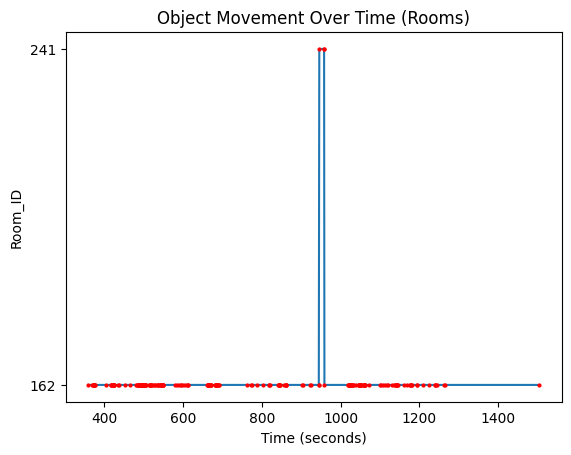

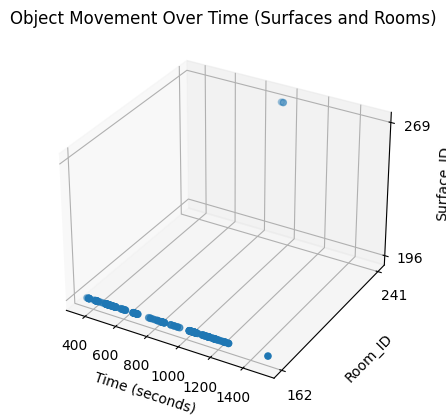

[['book']]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]


In [ ]:
# Visualize movement of one object over a day
all_obj_idx = train[['Obj_ID']].values.astype(int)
all_obj_names = train[['Obj_name']].values.astype(str)
obj_idx = np.where(train[['Obj_ID']] == 1023)[0]
time = train[['Time']].values.astype(float)
room_id = train[['Room_ID']].values.astype(int)
surface_id = train[['Surface_ID']].values.astype(int)
time_obj = time[obj_idx]
room_obj = room_id[obj_idx]
surface_obj = surface_id[obj_idx]

# Plot object movement over time from room to room
plt.yticks(np.array([1,41,162,241]))
plt.plot(time_obj,room_obj,marker='o',markersize=2,mfc='r',mec='r')
plt.xlabel('Time (seconds)')
plt.ylabel('Room_ID')
plt.title('Object Movement Over Time (Rooms)')
plt.show()

# Plot object movement over time from surface to surface
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot3D(time_obj,room_obj,surface_obj)
ax.scatter(time_obj,room_obj,surface_obj)
# plt.plot(time_obj,surface_obj,marker='o',markersize=2,mfc='r',mec='r')
y_axis = np.unique(room_obj)
z_axis = np.unique(surface_obj)
ax.set_yticks(y_axis)
ax.set_zticks(z_axis)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Room_ID')
ax.set_zlabel('Surface_ID')
ax.set_title('Object Movement Over Time (Surfaces and Rooms)')
plt.show()

# Print out cluster of objects in each room at time = 360
time_360 = np.where(time == 360)[0]
room_id_360 = room_id[time_360]
obj_id_360 = all_obj_idx[time_360]
obj_name_360 = all_obj_names[time_360]

bathroom_cluster_idx = np.where(room_id_360 == 1)[0]
bathroom_cluster = obj_name_360[bathroom_cluster_idx]

bedroom_cluster_idx = np.where(room_id_360 == 162)[0]
bedroom_cluster = obj_name_360[bedroom_cluster_idx]

office_cluster_idx = np.where(room_id_360 == 241)[0]
office_cluster = obj_name_360[office_cluster_idx]

dining_cluster_idx = np.where(room_id_360 == 41)[0]
dining_cluster = obj_name_360[dining_cluster_idx]
print(bedroom_cluster)
print(time_360)